<a href=" " target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Hunters: Predicting Real Estate Prices using Machine Learning in Python
### **WORKBOOK**
---

## External dependencies - DO NOT MODIFY

In [ ]:
training_data_file_url = 'https://raw.githubusercontent.com/patohdzs/wfs-fintech-workshops/main/house-hunters/training_dataset.csv'
test_data_file_url = 'https://raw.githubusercontent.com/patohdzs/wfs-fintech-workshops/main/house-hunters/test_dataset.csv'

## Notebook Format


*   The notebook is divided into various sections, separated by headers in a larger font size.
*   Each section will have text describing what is being done, hopefully serving both as useful instruction of what to code but also which modelling stage we are incorporating and why.
---
* **Instructions on the tasks will appear separated and in bold font at the end of each piece of text, and the corresponding solution should be written in a cell directly below.**

*   **Sometimes code will already be written in this cell either as an example or to carry out tasks that go beyond the scope of this workshop. In these cases, you should add your code in between the lines commented `#### ADD YOUR CODE HERE ####` and `##############`.**

*   **Exercise: try printing out "Hello World" in the cell below.**


In [ ]:
#### ADD YOUR CODE BELOW ####

#############################

Hello World


## Step 1: Importing external modules

When coding an ML project, we will use a few external libraries within our code. We do this as these libraries contain code for standard operations that we will have to do repeatedly, so it is time-efficient and easier to just re-use this code instead of trying to "re-invent the wheel". In this project, we will use the following libraries:

- Pandas and NumPy:
  - Used for matrix and vector manipulation. Necesary since all of our data is in the form of these objects.
- Seaborn and Matplotlib:
  - Used for producing visualizations, graphs and charts.
- Scikit Learn:
  - Main Python machine learning library!
  - Contains methods that build, fit, predict, and assess ML models.


In [ ]:
# Importing NumPy and Pandas libraries - matrix and vector manipulation
import numpy as np
import pandas as pd

# Importing Matplotlib and Seaborn - graphics and visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Importing Scikit Learn modules - Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



## Step 2: Download datasets



*   The first thing we need to do before we build our ML model is to download our datasets.
*   We can do this quite easily if they are in `.csv` format files (most spreadsheet type files can be converted into `.csv`)
*   We download files using the `.read_csv(filepath)` function from the Pandas library:
  *   Takes in the filepath as an argument.
  *   Outputs the dataset as a Pandas DataFrame, which is what we usually want for ML.
* The above has been done to download our training dataset in the cell below.

---

*   **The filepath for our test dataset is already saved under the variable** `test_data_file_url` **. Try downloading this dataset in the cell below and assign it to variable** `test_data` **.**



In [ ]:

data = pd.read_csv(training_data_file_url)

#### ADD YOUR CODE HERE ####

############################
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 3: Construct target vector and feature matrix



*   The next step after downloading our datasets is to construct a *feature matrix* and a *target vector*.
  *  Feature matrix: subset of our whole dataset containing only variables that we want to model as explanatory variables. Variables are represented as columns while each row represents an observations.
  *   Target vector: single vector containing data for the variable we are interested in predicting.
  
*   To construct the above objects all we need to do is select specific columns  from our dataset:
  1.   Create a list containing the variable names of explanatory variables
      *   Not necessary for target vector
  2.   Index your dataset to select only these columns
      *   eg.// `dataset[variable_names_list]`
      *   For target vector: `dataset[target_variable_name]`
  3.   Save the selected samples into new variables
      *   Conventionally, we use `X` for the feature matrix and `y` for target vector
---
*   **Try creating a feature matrix and target vector for our dataset using the variables below. Assign these to** `X `**and**` y ` **respectively.**
*   **Explanatory variables:** `'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'`

*   **Target variable:** `'SalePrice'`



In [ ]:
#### ADD CODE HERE ####

# Define features for our model

# Create feature matrix

# Create target vector


########################



*   After we've created our feature matrix and target vector, we're gonna want to split these into training and validation samples.


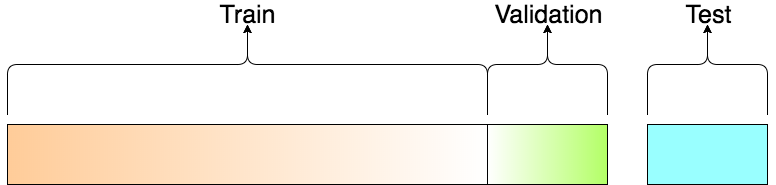


  *   The training sample consists of observations that we use to fit our model
  *   The validation sample consists of observations which we use to asses how good our model is at predicting *out of sample*

*   We want roughly 80%-70% of our data to be used in the training sample, but this varies depending on our dataset.

*   To split our dataset into the two samples we use the train-test split function:
  *   `X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=(???), random_state=(???))`
  *   Here, we need to pass two arguments:
      *   `test_size`: a number from 0 to 1 specifying the desired proportion of observations that go into the validation sample
      *   `random_state`: an integer from 0 to 42 (we don't care which one, just pass one) that guarrantees that data is always split the same way. This allows our results to be *reproducible*.
---
*   **Try creating training and validation samples using the instructions above and the feature matrix and target vector you created previously.**


In [ ]:
#### ADD CODE HERE ####

# Split dataset into training and validation sample

#######################

## Step 4: Construct and fit our models



*   Now that we have our data samples ready, its time to build our models.
*   To do this, we first instantiate these as objects using classes from Scikit Learn and assign them to a variable. 
  *   The constructor methods for linear regression and decision tree models in Scikit are `LinearRegression()` and `DecisionTreeRegressor` respectively.
*   Then, we call the `.fit(X,y)` method, passing in our training sample as arguments.
*   The above has been done for the decision tree model below.
  *   For this model we also passed an additional `random_state` argument to ensure that the same tree is built every time, but this won't be necessary for most regression models.
---
*   **Try instantiating and fitting the linear regression model in the cell below. When instantiating it, assign it to variable** `lr`**.**



In [ ]:
# Instantiating and fitting Decision Tree model
dt = DecisionTreeRegressor(random_state = 1)
dt.fit(X_train, y_train)


#### ADD YOUR CODE HERE ####

# Instantiating and fitting Linear Regression model

############################


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 5: Validate our models

*   To predict our target vector for some sample of observations using our model, we use the `.predict(X)` method on the desired model, passing as an argument the feature data of our sample.
*   This is shown in the cell below for the linear regression model.

---
*   **Try predicting the y values for observations in the `X_train` sample using the decision tree model, and assign the results to variable `y_pred_dt`.**



In [ ]:
y_pred_lr = lr.predict(X_val)

#### ADD YOUR CODE HERE ####

############################



*    After we are done predicting, we need some way of assesing how good our predictions are. This process is called *validation*.
*    The validation metric used for this model is the Root-Mean Squared Error of predictions: $$\sqrt{  \frac{ \sum_{i=1}^{n} (y_i-\hat{y_i})^2 }{n}\ } $$ Where $\hat{y_i}$ is the predicted value and $y_i$ the true value for the $i$th observation, and $n$ is the number of observations.

*   To compute this, we use the function `mean_squared_error(y_true, y_pred)`, assign it to some variable and then just take its square root.
*   This has been done and is shown in the cell below for the linear regression model.
---
*   **Try computing the RMSE for the decision tree model. Assign it to variable `mse_dt`**
*   **Print out the RMSE for the decision tree model. Right now, which seems to be a better model? LR or DT?**

In [ ]:
# Computing RMSE for linear regression predictions
rmse_lr = mean_squared_error(y_val, y_pred_lr)
rmse_lr = round(rmse_lr**0.5,2)
print('RMSE Linear Regression: $', rmse_lr)

#### ADD YOUR CODE HERE ####

# Computing RMSE for decision tree predictions

############################

RMSE Linear Regression: $ 40873.73
RMSE Decision Tree: $ 46729.33


## Step 6: Hyperparameter tuning



*   Now that we know how to build, predict, and validate models, we will focus on how to tune them to improve their performance.
*   Steps for hyperparameter tuning:

  1.   Choose a hyperparameter.
  2.   Create a list containing different possible arguments for this hyperparamter.
  3. Iterate through this list. At each iteration, build and validate an instance of your model passing in the corresponding hyperparameter argument.
  4. Assess the validations to determine which hyperparameter argument improves predictive performance the most

---
*   **Declare a list with the following possible arguments for the** `max_leaf_nodes` **parameter:** `5, 25, 50, 100, 250, 500` **.**
*   **Use a 'for' loop to iterate through this list. At each iteration, call the function** `get_rmse` **which will build and validate a model with the hyperparameter being tested. Assign this result to variable** `rmse` **.**

* **At each iteration, print out the RMSE (stored as variable** `rmse` **) and the hyperparameter argument tested.**

In [ ]:
def get_rmse(max_leaf_nodes, X_train, X_val, y_train, y_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_preds_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_preds_val)
    rmse = round(rmse**0.5,2)
    return(rmse)

#### ADD CODE HERE ####

# Tuning hyperparameter 'max_leaf_nodes'

#######################

max_leaf_nodes:  5
RMSE: $ 50830.83

max_leaf_nodes:  25
RMSE: $ 43046.78

max_leaf_nodes:  50
RMSE: $ 43152.99

max_leaf_nodes:  100
RMSE: $ 43759.58

max_leaf_nodes:  250
RMSE: $ 44536.45

max_leaf_nodes:  500
RMSE: $ 45337.72



## Step 7: Build the final models and predict


*   For the final stage of our modelling, we will now build tuned models and use them to predict on *unlabeled data*.
*   We will train these models with our complete dataset (training sample + validation sample).
*   We will use hyperparameter arguments that improved performance the most.
---



**1.   Create a feature matrix for the test sample** `test_data` **using the features selected in Step 3. Assign it to variable** `X_test` **.**

**2.   Instantiate our two final linear regression and decision tree models, and remember to pass our optimal hyperparameters when doing this. Assign these to variables** `final_lr` **and** `final_dt` **respectively.**

**3.   Fit these models using our complete labeled dataset, which is stored under variables** `X` **and** `y` **for the feature matrix and target vector respectively.**

**4.   Use our fitted models to predict y-values for our** `X_test` **sample. Assign the predictions to variables** `y_pred_final_lr` **and** `y_pred_final_dt` **for linear regression and decision tree final models respectively**






In [ ]:
#### ADD CODE HERE ####

# Create test feature matrix

# Instantiate final models

# Fit final models

# Predict using our final models

#######################

## Step 8 (Optional): Submit your predictions



*   In this section, we wrote some code that turns your predictions into `.csv` files.
*   These files are suitable submissions to the Kaggle Housing Prices competition. Kaggle is a mecca for datasets, ML competitions, Notebooks and anything data-related.
*   To submit your predictions click on [this link](https://www.kaggle.com/c/home-data-for-ml-course), create a Kaggle profile and follow the isntructions in the website. Contact us if you need any assistance in the process.

*  After submitting, you will be able to see how your predictions stack up against other competitors in the leaderboard. We recommend you then spend some time working on this model to improve your score. The next section includes some suggestions on how you may go about this.
---
*   **If you want to create submission files, uncomment lines 3 and 7 in the cell below.**



In [ ]:
# Creating submission file for linear regression predictions
output = pd.DataFrame({'Id': test_data.Id,'SalePrice': y_pred_final_lr})
#output.to_csv('submission_lr.csv', index=False)

# Creating submission file for decision tree predictions
output = pd.DataFrame({'Id': test_data.Id,'SalePrice': y_pred_final_dt})
#output.to_csv('submission_dt.csv', index=False)

## Step 9 (Optional): Tips to improve your model



1.   Try including more features
  - How do we treat categorical vs continuous features?
  -  Does more features always $\implies$ better model?
  - Curse of dimensionality
  
2.   Try tuning other hyper-parameters
  - Using multiple sample cross-validation
  - Using grid-search to cross-validate
3.   Try using different (more advanced) models
  - LAST THING TO CHANGE!!!!!!
  - Regularized regression: Ridge, Lasso, Elastic Net
  - Support vector machines: SVRegressor
  - Tree-based models: Random Forest
  - Holy Grail: XGBoost Regressor

